In [4]:
#K-nearest neighbours- Supervised
#Instance vs Parametric

In [7]:
import numpy as np

In [30]:
#Euclidean distance (L2)
#(x1, y1), (x2, y2)

a = np.array([1,2,3])
b = np.array([4,5,6])

l2dist = (np.sum((b-a)**2))**0.5
print(l2dist)

#Manhattan Distance (L1)
#(x2-x1)+(y2-y1)

l1ist =(np.sum(abs(a-b))
l1ist

SyntaxError: invalid syntax (<ipython-input-30-5bdeaa7ca3fc>, line 14)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
mean1 = np.array([1,0])
#coveriance
cov1 = np.array([[1,0.1],[0.1,1.2]])
dist1 = np.random.multivariate_normal(mean1,cov1,500)
dist1.shape

mean2 = np.array([4,5])
cov2 = np.array([[1,0.1],[0.1,1.2]])
dist2 = np.random.multivariate_normal(mean2,cov2,500)
dist2.shape

(500, 2)

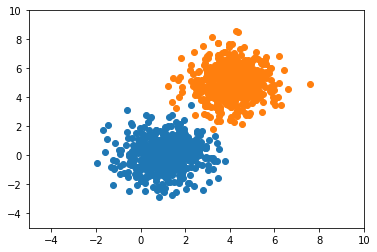

In [16]:
plt.xlim(-5,10)
plt.ylim(-5,10)
plt.scatter(dist1[:,0], dist1[:,1])
plt.scatter(dist2[:,0], dist2[:,1])
plt.show()

In [17]:
data = np.zeros((1000,3))

data[:500, :2] = dist1
data[500:, :2] = dist2
data[500:, -1] = 1
print(data.shape)
data.mean(axis=0)

(1000, 3)


array([2.56777294, 2.52322227, 0.5       ])

In [18]:
np.random.shuffle(data)
data[:10]

array([[ 3.53240469,  6.14571973,  1.        ],
       [ 3.31400648,  6.20344787,  1.        ],
       [ 4.58349922,  4.24092072,  1.        ],
       [ 3.51866624,  0.40625786,  0.        ],
       [-0.00684487, -1.01102025,  0.        ],
       [ 4.03933638,  5.47379551,  1.        ],
       [ 1.93947507,  0.57718692,  0.        ],
       [ 0.42259237, -0.90000209,  0.        ],
       [ 2.48559515,  1.13716569,  0.        ],
       [ 1.41501006, -0.06939227,  0.        ]])

In [19]:
def distance(a,b):
    return (np.sum((b-a)**2))**0.5

In [36]:
def knn(x_train, y_train, test_point, k=7):
    vals = []
    
    for i in range(x_train.shape[0]):
        d = distance(x_train[i], test_point)
        vals.append([d, y_train[i]])
        
    sorted_label = sorted(vals, key=lambda r:r[0])
    neighbors = np.asarray(sorted_label)[:k, -1] #asarray use as a numpy array it will not be dublicated
    
    #print(neighbors)
    
    freq = np.unique(neighbors, return_counts=True)
    
    index = freq[1].argmax()#argmax- maximum value ka index
    return freq[0][index]
    
    
    

In [37]:
x_train = data[:, :2]
y_train = data[:, -1]
test_point = np.array([2,3])

knn(x_train,y_train,test_point)

0.0

In [38]:
split = int (0.75 * data.shape[0])

x_train = data[:split, :2]
y_train = data[:split, -1]

x_test = data[split:, :2]
y_test = data[split:, -1]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(750, 2) (750,)
(250, 2) (250,)


In [41]:
def acc(k):
    
    predictions = []
    
    for i in range(x_test.shape[0]):
        test_point = x_test[i]
        predicted_label = knn(x_train,y_train, test_point, k)
        predictions.append(predicted_label)
        
    preds = np.asarray(predictions)
#    print(y_test == preds)
    
    return 100 * (y_test == preds).sum()/ preds.shape[0]

In [48]:
acc(8)

100.0

In [49]:
for k in range(1,50):
    print(f"For k={k} acc={acc(k)}")

For k=1 acc=100.0
For k=2 acc=100.0
For k=3 acc=100.0
For k=4 acc=100.0
For k=5 acc=100.0
For k=6 acc=100.0
For k=7 acc=100.0
For k=8 acc=100.0
For k=9 acc=100.0
For k=10 acc=100.0
For k=11 acc=100.0
For k=12 acc=100.0
For k=13 acc=100.0
For k=14 acc=100.0
For k=15 acc=100.0
For k=16 acc=100.0
For k=17 acc=100.0
For k=18 acc=100.0
For k=19 acc=100.0
For k=20 acc=100.0
For k=21 acc=100.0
For k=22 acc=100.0
For k=23 acc=100.0
For k=24 acc=100.0
For k=25 acc=100.0
For k=26 acc=100.0
For k=27 acc=100.0
For k=28 acc=100.0
For k=29 acc=100.0
For k=30 acc=100.0
For k=31 acc=100.0
For k=32 acc=100.0
For k=33 acc=100.0
For k=34 acc=100.0
For k=35 acc=100.0
For k=36 acc=100.0
For k=37 acc=100.0
For k=38 acc=100.0
For k=39 acc=100.0
For k=40 acc=100.0
For k=41 acc=100.0
For k=42 acc=100.0
For k=43 acc=100.0
For k=44 acc=100.0
For k=45 acc=100.0
For k=46 acc=100.0
For k=47 acc=100.0
For k=48 acc=100.0
For k=49 acc=100.0


In [50]:
import sklearn

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(x_train,y_train)
neigh.score(x_test,y_test)

1.0